In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("Movie_Id_Titles.csv")
rating = pd.read_csv("Dataset.csv")

In [3]:
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
rating.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [5]:
df = pd.merge(rating, movies, on="item_id")

In [6]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [7]:
df.drop("timestamp", axis=1, inplace=True)

In [8]:
Avg_rating_movie = df.groupby("title")

In [9]:
Avg_rating_movie

In [10]:
Avg_rating_movie["rating"].mean().sort_values(ascending=True).head()   # Least Rating

title
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
Butterfly Kiss (1995)                           1.0
Daens (1992)                                    1.0
JLG/JLG - autoportrait de décembre (1994)       1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Name: rating, dtype: float64

In [11]:
Avg_rating_movie["rating"].mean().sort_values(ascending=False).head()  # Best Rating

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [12]:
Count_movie = df.groupby("title")

In [13]:
Count_movie

In [14]:
Count_movie["rating"].count().sort_values(ascending=True).head()

title
Á köldum klaka (Cold Fever) (1994)            1
Mille bolle blu (1993)                        1
Mat' i syn (1997)                             1
Marlene Dietrich: Shadow and Light (1996)     1
Man from Down Under, The (1943)               1
Name: rating, dtype: int64

In [15]:
Count_movie["rating"].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

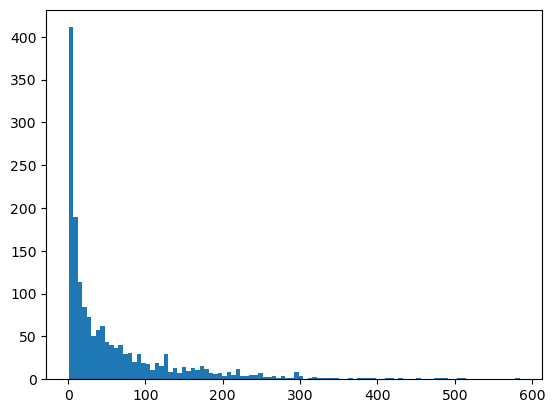

In [16]:
plt.hist(Count_movie["rating"].count(), bins=100)
plt.show()

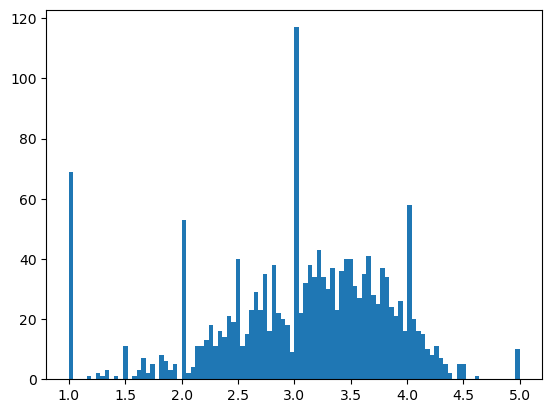

In [17]:
plt.hist(Avg_rating_movie["rating"].mean(), bins=100)
plt.show()

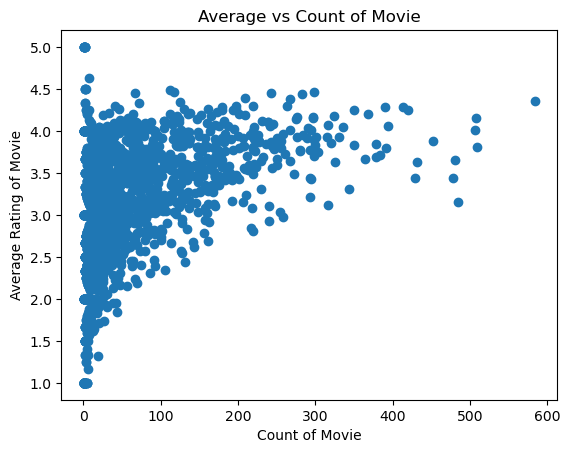

In [18]:
plt.scatter(Count_movie["rating"].count(), Avg_rating_movie["rating"].mean())
plt.xlabel("Count of Movie")
plt.ylabel("Average Rating of Movie")
plt.title("Average vs Count of Movie")
plt.show()

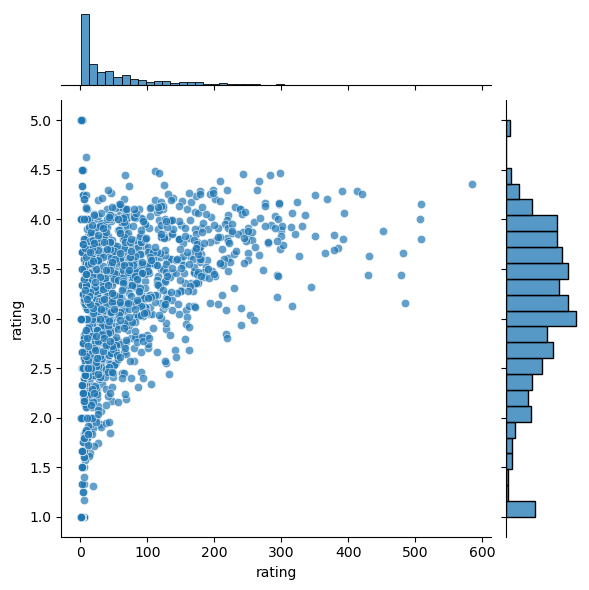

In [19]:
import seaborn as sns
sns.jointplot(x=Count_movie["rating"].count(), y=Avg_rating_movie["rating"].mean(), alpha=0.7)
plt.show()

In [20]:
matrix_movie = df.pivot_table(index="user_id", columns="title", values="rating")
matrix_movie.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
sw_ratings = matrix_movie["Star Wars (1977)"]
sw_ratings

user_id
0      5.0
1      5.0
2      5.0
3      NaN
4      5.0
      ... 
939    NaN
940    4.0
941    NaN
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

In [22]:
similar_to_sw = matrix_movie.corrwith(sw_ratings)

C:\Users\Aditi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Aditi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [23]:
similar_to_sw

title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [24]:
corr_sw = pd.DataFrame(similar_to_sw, columns=["Correlation"])

In [25]:
corr_sw.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [26]:
corr_sw.isna().sum()

Correlation    254
dtype: int64

In [27]:
corr_sw.sort_values("Correlation", ascending=False).head()

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0


In [28]:
matrix_user = df.pivot_table(index="title", columns="user_id", values="rating")
matrix_user.head()

user_id,0,1,2,3,4,5,6,7,8,9,...,934,935,936,937,938,939,940,941,942,943
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,2.0,NaN,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,5.0,NaN,NaN,NaN,NaN,4.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
similar_to_1 = matrix_movie.corrwith(matrix_user[895])

In [30]:
similar_to_1

title
'Til There Was You (1997)               NaN
1-900 (1994)                            NaN
101 Dalmatians (1996)                   NaN
12 Angry Men (1957)                     NaN
187 (1997)                              NaN
                                         ..
Young Guns II (1990)                    NaN
Young Poisoner's Handbook, The (1995)   NaN
Zeus and Roxanne (1997)                 NaN
unknown                                 NaN
Á köldum klaka (Cold Fever) (1994)      NaN
Length: 1664, dtype: float64

In [31]:
corr_1 = pd.DataFrame(similar_to_1, columns=["Correlation"])

In [32]:
corr_1.sort_values("Correlation", ascending=False).head()

,Correlation
title,
'Til There Was You (1997),NaN
1-900 (1994),NaN
101 Dalmatians (1996),NaN
12 Angry Men (1957),NaN
187 (1997),NaN


In [33]:
corr_1.isna().sum()

Correlation    1664
dtype: int64